**Распознавание объектов по аудиосигналу**

Для обучения модели необходимо собрать набор данных из аудиосигналов по следующим классам:
- **человек (человеческая речь и тд);**
1. Surrey Audio-Visual Expressed Emotion ([SAVEE](https://www.kaggle.com/ejlok1/surrey-audiovisual-expressed-emotion-savee))
2. Ryerson Audio-Visual Database of Emotional Speech and Song ([RAVDESS](https://www.kaggle.com/uwrfkaggler/ravdess-emotional-speech-audio))
3. Toronto emotional speech set ([TESS](https://www.kaggle.com/ejlok1/toronto-emotional-speech-set-tess))
4. Crowd-sourced Emotional Mutimodal Actors Dataset ([CREMA-D](https://www.kaggle.com/ejlok1/cremad))
- **автомобиль (шум автомобиля и тд);**
1. [Vehicle Type Sound Dataset](https://www.kaggle.com/datasets/brinkor/vehicle-type-sound-dataset)
2. [Car](https://research.google.com/audioset///download.html) здесь данные в формате csv с ссылкой на YouTube
3. [Car-Engine-Sounds-Dataset](https://github.com/AwaisSabit/Car-Engine-Sounds-Dataset) здесь формат mp4
- **животное (звуки, издаваемые животными и тд);**
1. [Animal sound](https://www.kaggle.com/datasets/maulanaakbardwijaya/animal-sounds-dataset) здесь всего 24 файла
2. [animal sound database](https://www.kaggle.com/datasets/anveshkalwa/animal-sound-database) здесь всего 74 файла
3. [Animals Sound Dataset](https://www.kaggle.com/datasets/caoofficial/animal-sounds) здесь есть файлы длиной больше 5с
4. [Music and Animal Basic Emotions](https://www.kaggle.com/datasets/jocelyndumlao/music-and-animal-basic-emotions) всего 81 файл
- **БПЛА (шум винтов и тд);**
- **шум (если требуется для выбранного алгоритма или модели).**


Вопросы:
- можно ли брать данные с английским языком для человеческой речи или обязтельно только на русском
- можно ли собирать звук с видео на ютуб

**Сбор данных:**

**Человек (человеческая речь)**

**1. Surrey Audio-Visual Expressed Emotion (SAVEE)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
SAVEE = "/content/drive/MyDrive/SAVEE/ALL/"

dir_list = os.listdir(SAVEE)
dir_list[0:5]

['DC_a01.wav', 'DC_f10.wav', 'DC_f09.wav', 'DC_f06.wav', 'DC_f05.wav']

В этом датасете аудио файлы называны специальным образом.  DC, JE, JK, KL - это спикеры. Буквами обозначены эмоции:

- 'a' = 'anger'
- 'd' = 'disgust'
- 'f' = 'fear'
- 'h' = 'happiness'
- 'n' = 'neutral'
- 'sa' = 'sadness'
- 'su' = 'surprise'

В этом датасете собраны аудиофайлы с записью мужского голоса.

In [ ]:
# проанализируем имя файла, чтобы получить представление об эмоциях
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error')
    path.append(SAVEE + i)

emotion

['male_angry',
 'male_fear',
 'male_fear',
 'male_fear',
 'male_fear',
 'male_fear',
 'male_fear',
 'male_fear',
 'male_fear',
 'male_fear',
 'male_fear',
 'male_disgust',
 'male_disgust',
 'male_disgust',
 'male_disgust',
 'male_disgust',
 'male_disgust',
 'male_disgust',
 'male_disgust',
 'male_disgust',
 'male_disgust',
 'male_disgust',
 'male_disgust',
 'male_disgust',
 'male_disgust',
 'male_disgust',
 'male_angry',
 'male_angry',
 'male_angry',
 'male_angry',
 'male_angry',
 'male_angry',
 'male_angry',
 'male_angry',
 'male_angry',
 'male_angry',
 'male_angry',
 'male_angry',
 'male_angry',
 'male_angry',
 'male_neutral',
 'male_neutral',
 'male_neutral',
 'male_neutral',
 'male_neutral',
 'male_neutral',
 'male_neutral',
 'male_neutral',
 'male_neutral',
 'male_neutral',
 'male_neutral',
 'male_neutral',
 'male_neutral',
 'male_neutral',
 'male_neutral',
 'male_neutral',
 'male_neutral',
 'male_happy',
 'male_happy',
 'male_happy',
 'male_happy',
 'male_happy',
 'male_happy',
 

In [ ]:
# посмотрим на распределение лейблов
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df

labels
0       male_angry
1        male_fear
2        male_fear
3        male_fear
4        male_fear
..             ...
475  male_surprise
476  male_surprise
477  male_surprise
478  male_surprise
479  male_surprise

[480 rows x 1 columns]

In [ ]:
SAVEE_df['source'] = 'SAVEE'
SAVEE_df

labels source
0       male_angry  SAVEE
1        male_fear  SAVEE
2        male_fear  SAVEE
3        male_fear  SAVEE
4        male_fear  SAVEE
..             ...    ...
475  male_surprise  SAVEE
476  male_surprise  SAVEE
477  male_surprise  SAVEE
478  male_surprise  SAVEE
479  male_surprise  SAVEE

[480 rows x 2 columns]

In [ ]:
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df

labels source                                          path
0       male_angry  SAVEE   /content/drive/MyDrive/SAVEE/ALL/DC_a01.wav
1        male_fear  SAVEE   /content/drive/MyDrive/SAVEE/ALL/DC_f10.wav
2        male_fear  SAVEE   /content/drive/MyDrive/SAVEE/ALL/DC_f09.wav
3        male_fear  SAVEE   /content/drive/MyDrive/SAVEE/ALL/DC_f06.wav
4        male_fear  SAVEE   /content/drive/MyDrive/SAVEE/ALL/DC_f05.wav
..             ...    ...                                           ...
475  male_surprise  SAVEE  /content/drive/MyDrive/SAVEE/ALL/KL_su07.wav
476  male_surprise  SAVEE  /content/drive/MyDrive/SAVEE/ALL/KL_su09.wav
477  male_surprise  SAVEE  /content/drive/MyDrive/SAVEE/ALL/KL_su10.wav
478  male_surprise  SAVEE  /content/drive/MyDrive/SAVEE/ALL/KL_su06.wav
479  male_surprise  SAVEE  /content/drive/MyDrive/SAVEE/ALL/KL_su05.wav

[480 rows x 3 columns]

In [ ]:
SAVEE_df.labels.value_counts()

labels
male_neutral     120
male_angry        60
male_fear         60
male_disgust      60
male_happy        60
male_surprise     60
male_sad          60
Name: count, dtype: int64

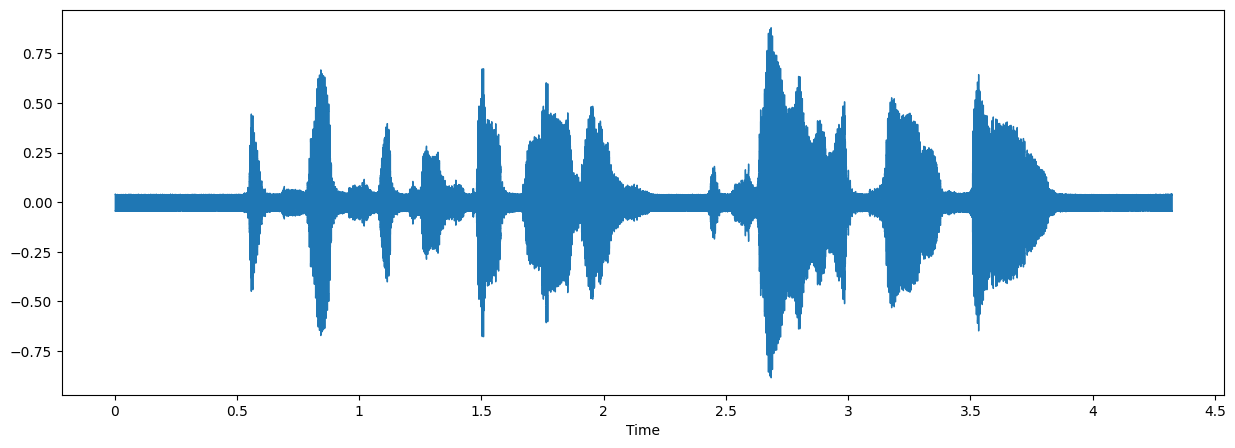

In [ ]:
fname = SAVEE + 'DC_f11.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# воспроизведем аудио
ipd.Audio(fname)

Итак, это хорошая выборка. Фонового шума немного, а речь очень четкая. Так что это хорошая новость для нас с точки зрения качества данных. Волновой график на самом деле мало о чем говорит, кроме того, что есть вариации в волне, что хорошо.

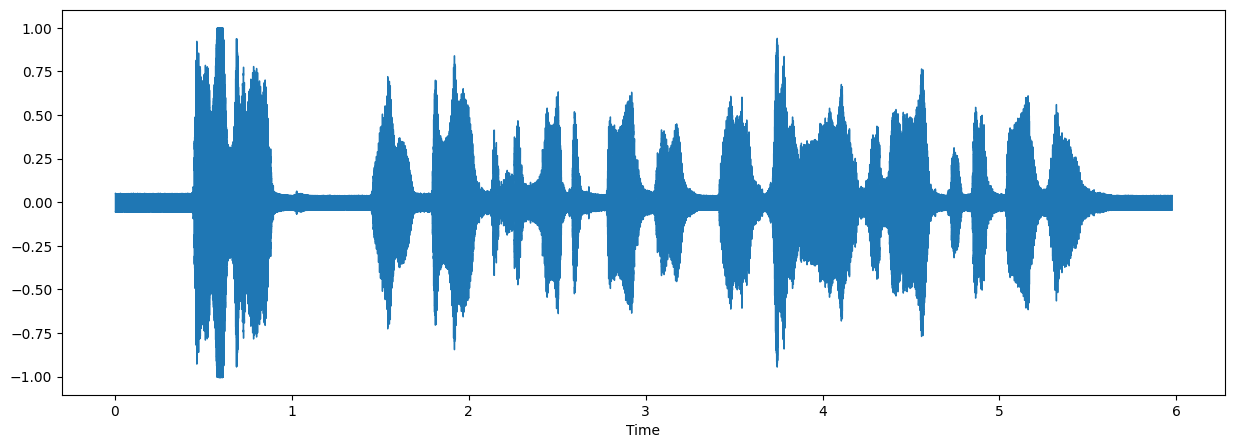

In [ ]:
# воспроизведем трек с счастливым голосом
fname = SAVEE + 'DC_h11.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

ipd.Audio(fname)

**Вывод по данным SAVEE:**

Итак, опять же, звук хорошего качества. И я вижу, что форма волны заметно отличается от формы звука fear. Это хорошо. Можно заметить, что между началом и окончанием очень короткий период молчания. Возможно, позже мы сможем обрезать его, чтобы улучшить качество. Кроме того, произнесенное предложение отличается.

**Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)**

RAVDESS - один из наиболее распространенных наборов данных. Он пользуется популярностью благодаря качеству динамиков, записи и 24 актерам разного пола. Для удобства, вот идентификаторы имен файлов, указанные на официальном веб-сайте RAVDESS:

- Режим (01 = полный аудио-, 02 = только для видео, 03 = только для аудио).
- Голосовой канал (01 = речь, 02 = песня).
- Эмоции (01 = нейтральные, 02 = спокойные, 03 = счастливые, 04 = грустные, 05 = сердитые, 06 = испуганные, 07 = с отвращением, 08 = удивленные).
- Эмоциональная интенсивность (01 = нормальная, 02 = сильная). ПРИМЕЧАНИЕ: "Нейтральная" эмоция не отличается особой интенсивностью.
- Утверждение (01 = "Дети разговаривают за дверью", 02 = "Собаки сидят у двери").
Повторение (01 = 1-е повторение, 02 = 2-е повторение).
- Актер (с 01 по 24. Актеры с нечетными номерами - мужчины, с четными номерами - женщины).

Итак, вот пример имени аудиофайла. 02-01-06-01-02-01-12.mp4

Это означает, что метаданные для аудиофайла:

- Предназначены только для видео (02)
- Речь (01)
- Испуганный (06)
- Нормальная интенсивность (01)
- Фраза "собаки" (02)
- 1-е повторение (01)
- 12-й актер (12) - Женщина (так как идентификационный номер актера четный)

In [ ]:
RAV = "/content/drive/MyDrive/RAVDESS/audio_speech_actors_01-24/"

In [ ]:
dir_list = os.listdir(RAV)
dir_list.sort()
dir_list

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [ ]:
emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)


RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

labels
male_neutral       144
female_neutral     144
male_sad            96
male_happy          96
male_surprise       96
male_disgust        96
male_fear           96
male_angry          96
female_angry        96
female_sad          96
female_happy        96
female_surprise     96
female_disgust      96
female_fear         96
Name: count, dtype: int64

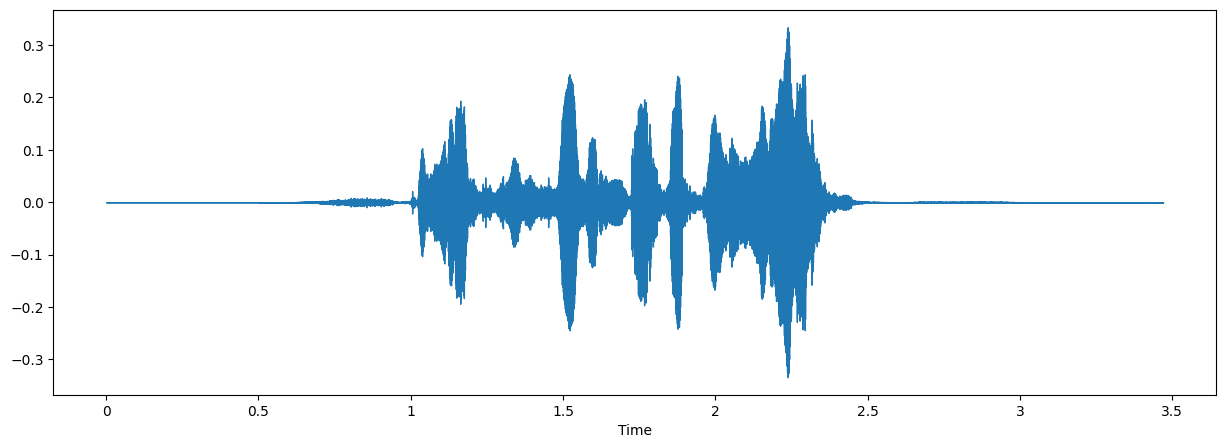

In [ ]:
# Выберем трек с испугом
fname = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

ipd.Audio(fname)

Отличное качество звука. И отличная постановка. Я думаю, можно действительно почувствовать страх, исходящий от выступающего. Можно заметить, что между началом и концом трека много тишины. Рассмотрим сейчас трек с эмоцией счастья.

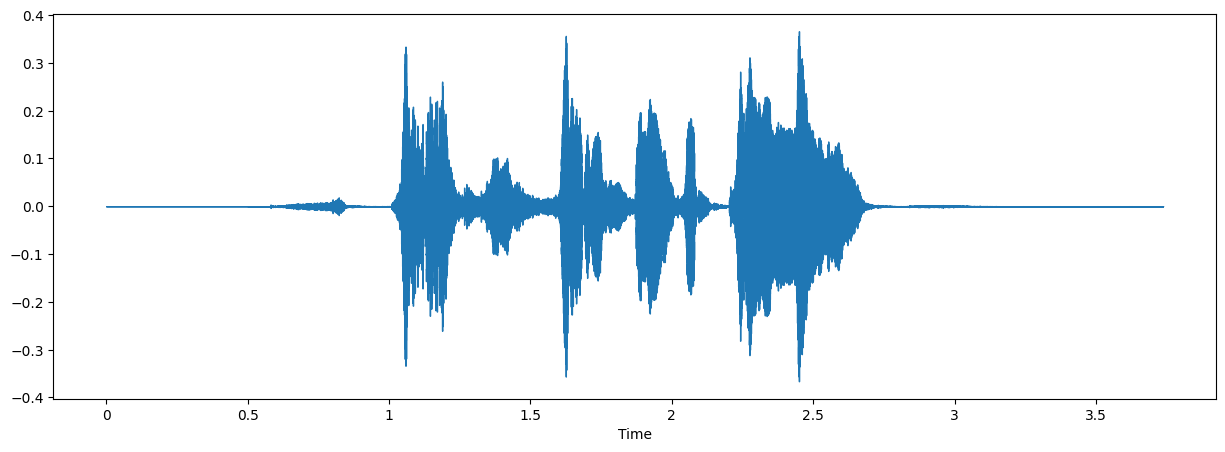

In [ ]:
fname = RAV + 'Actor_14/03-01-03-02-02-02-14.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

ipd.Audio(fname)

Глядя на график колебаний между двумя файлами, можно заметить, что единственное реальное различие - это амплитуда. В треке с эмоцией счастья амплитуда более высокая в разных точках.


**Toronto emotional speech set (TESS)**

Теперь перейдем к набору данных TESS. Здесь стоит отметить, что он основан только на двух докладчиках, молодой женщине и женщине постарше. Это должно уравновесить доминирование мужчин в выступлениях, которые есть у нас на SAVEE.

В нем представлены те же 7 ключевых эмоций. Но что немного отличается в этом наборе данных от двух предыдущих, приведенных выше, так это то, что добавлена эмоция "приятного удивления".

In [ ]:
TESS = "/content/drive/MyDrive/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"

In [ ]:
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [ ]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

labels
female_fear        400
female_surprise    400
female_sad         400
female_angry       400
female_disgust     400
female_happy       400
female_neutral     400
Name: count, dtype: int64

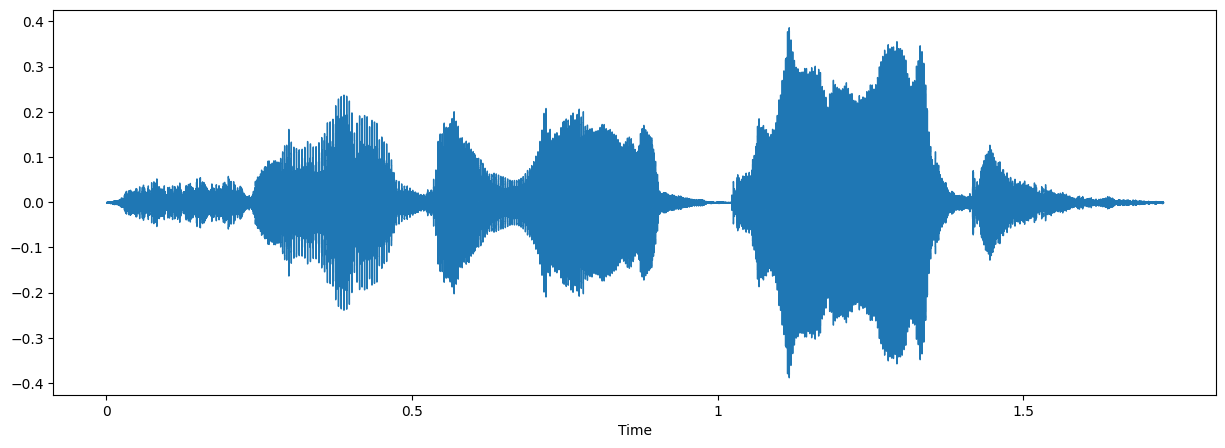

In [ ]:
# выберем трек с испугом
fname = TESS + 'YAF_fear/YAF_dog_fear.wav'

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

ipd.Audio(fname)

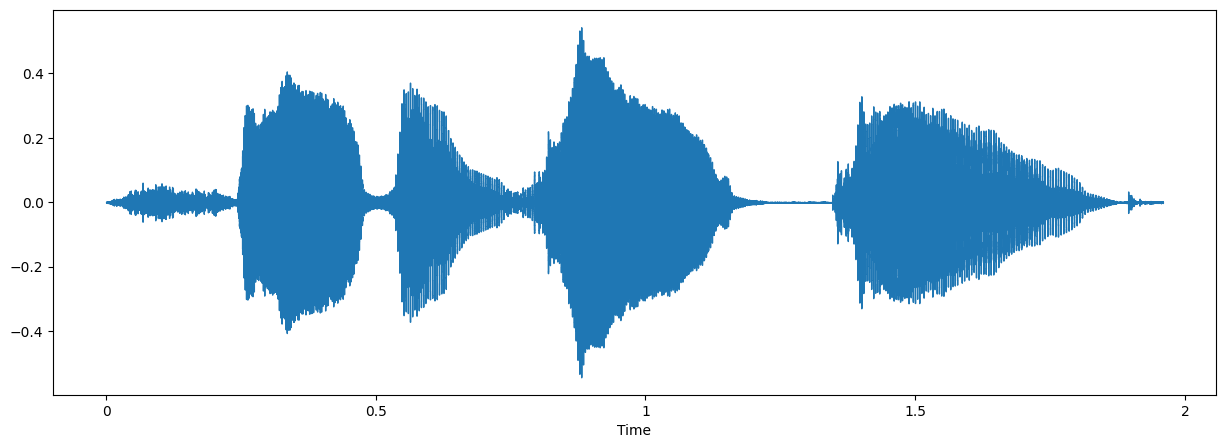

In [ ]:
fname = TESS + 'YAF_happy/YAF_dog_happy.wav'

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

ipd.Audio(fname)

Я обратила внимание на то, что качество звука хорошее, а также в некоторых точках высокая амплитуда

**Crowd-sourced Emotional Mutimodal Actors Dataset (CREMA-D)**

CREMA-D - это набор данных из 7442 оригинальных клипов, снятых 91 актером. В этих роликах приняли участие 48 актеров мужского пола и 43 актера женского пола в возрасте от 20 до 74 лет, представители различных рас и этнических групп (афроамериканцы, азиаты, белые, испаноязычные и неопределенные). Актеры озвучивали 12 предложений. В предложениях использовалась одна из шести различных эмоций (Гнев, Отвращение, Страх, Радость, Нейтральность и грусть) и четыре различных уровня эмоций (Низкий, средний, Высокий и неопределенный).

In [ ]:
CREMA = "/content/drive/MyDrive/CREMA-D/AudioWAV/"

In [ ]:
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [ ]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list:
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)

CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

labels
male_angry        671
male_disgust      671
male_fear         671
male_happy        671
male_sad          671
female_angry      600
female_disgust    600
female_fear       600
female_happy      600
female_sad        600
male_neutral      575
female_neutral    512
Name: count, dtype: int64

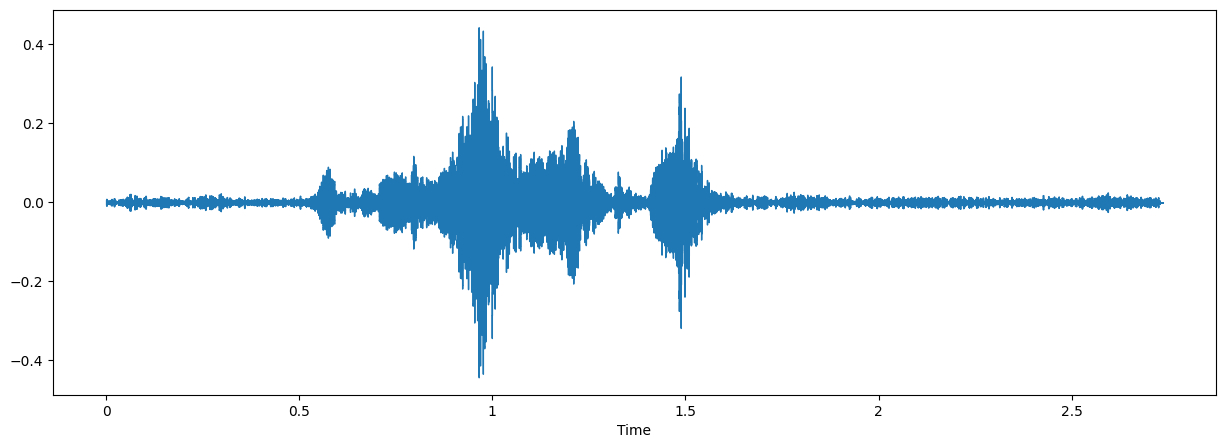

In [ ]:
fname = CREMA + '1012_IEO_HAP_HI.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

ipd.Audio(fname)

Звук сам по себе немного отдается эхом. Он не такой четкий, как то, что мы видели в других наборах данных. И я не уверена, что это можно считать выражением радости. Для меня это звучит скорее нейтрально. Но, с другой стороны, это может быть связано с качеством звука. Давайте послушаем еще одну аудиозапись с эмоцией страха.

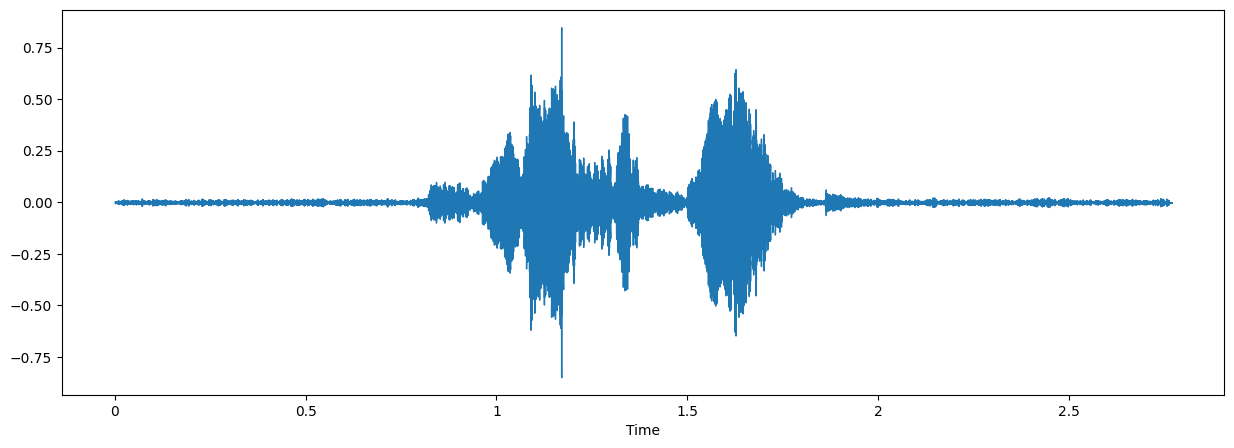

In [ ]:
fname = CREMA + '1012_IEO_FEA_HI.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

ipd.Audio(fname)

Произнесенное одно и то же предложение вполне убедительно говорит о том, что в нем присутствует эмоция страха. Это гораздо понятнее, чем в версии "счастье". После того, как были прослушаны несколько треков, я заметила, что набор данных сильно отличается по качеству. Некоторые из них получаются четкими, а некоторые - очень приглушенными или с эхом. Кроме того, в них много тишины. В целом, версия данных немного "грязнее". Но, тем не менее, данные хорошего качества. С другой стороны, слегка зашумленный набор данных послужил бы очень хорошим дополнением к данным, внеся шум в структуру

**Вывод по набору данных для человеческой речи**

Все 4 набора данных являются хорошими наборами данных. Выслушав их и проведя несколько действительно грубых проверок, я чувствую, что мы можем объединить их все. Нам все равно нужно это сделать, иначе мы столкнемся с проблемами при переобучении.



**Car-Engine-Sounds-Dataset**

Данный датасет был представлен в формате mp4. Поэтому для этого конвертируем в формат wav.

In [ ]:
car = "/content/drive/MyDrive/Abnormal Car Sounds/"

In [ ]:
!pip install pydub

In [ ]:
from pydub import AudioSegment

given_audio = AudioSegment.from_file("/content/drive/MyDrive/Abnormal Car Sounds/2008 Ford Edge Engine knocking.mp4", format="mp4")
given_audio = given_audio[:5000]
given_audio.export("/content/drive/MyDrive/cars/2008 Ford Edge Engine knocking.wav", format="wav")

<_io.BufferedRandom name='/content/drive/MyDrive/cars/2008 Ford Edge Engine knocking.wav'>

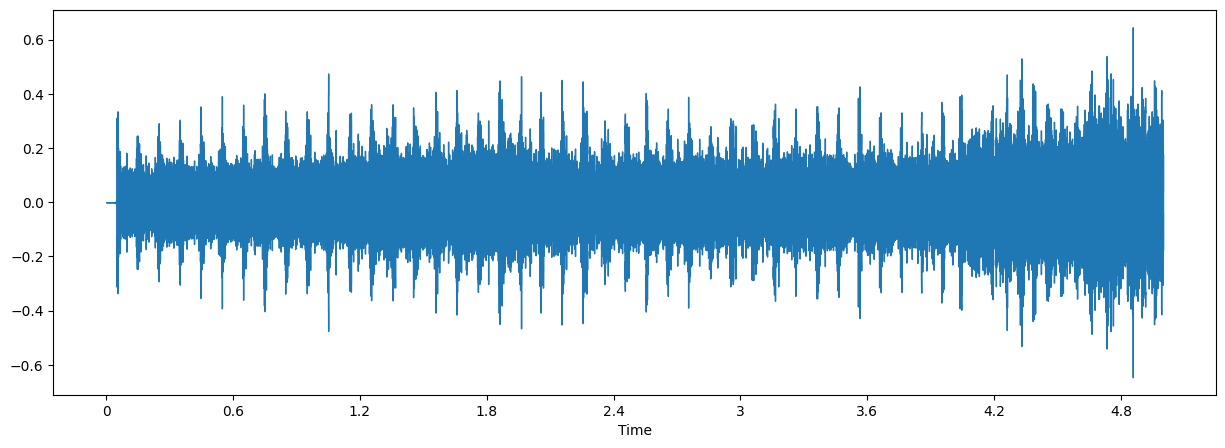

In [ ]:
fname = '/content/drive/MyDrive/cars/2008 Ford Edge Engine knocking.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

ipd.Audio(fname)

In [ ]:
dir_list = os.listdir(car)
dir_list.sort()
print(dir_list[0:10])

['2008 Ford Edge Engine knocking.mp4', '2013 Ford Edge 3.5 V6 ticking noise.mp4', '2018 Ford Explorer 3.5  knocking ticking noise.mp4', 'Alto 06.mp4', 'Alto 2006.mp4', 'Alto 2022.mp4', 'Alto 22.mp4', 'Audi 2008 A4 3.2L.mp4', 'Audi A4 2017 engine noise.mp4', 'Chevrolet 2000 Blazer Ls.mp4']


In [ ]:
for i in dir_list:
  given_audio = AudioSegment.from_file(car + i, format="mp4")
  given_audio = given_audio[:5000]
  given_audio.export(f'{car + i[:-3]}wav', format="wav")

Теперь удалим из папки файлы с расширением mp4

In [ ]:
import os

folder_path = car
file_list = os.listdir(folder_path)

for file in file_list:
    if file.endswith(".mp4"):
        os.remove(os.path.join(folder_path, file))

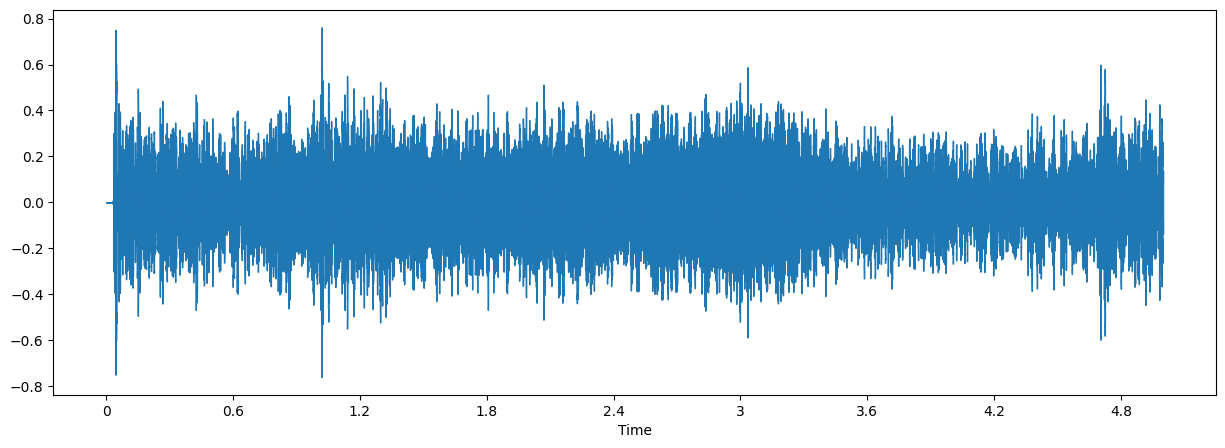

In [ ]:
fname = '/content/drive/MyDrive/Abnormal Car Sounds/Cultus 2018..wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

ipd.Audio(fname)

In [ ]:
!pip install pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.7 MB/s eta 0:00:00


In [ ]:
from pytube import YouTube

# Вставьте URL-адрес видео с YouTube
url = 'https://www.youtube.com/watch?v=c5kHrrDRqqM'
folder = '/content/drive/MyDrive/cars_youtube/'
# Создайте объект YouTube
yt = YouTube(url)

# Выберите аудио поток
audio_stream = yt.streams.filter(only_audio=True).first()

# Скачайте аудио
audio_stream.download(filename=folder + '1')


'/content/drive/MyDrive/cars_youtube/1'

In [ ]:
from pytube import YouTube
from pydub import AudioSegment

# Вставьте URL-адрес видео с YouTube
url = 'https://www.youtube.com/shorts/DB5w5-baWCo'
folder = '/content/drive/MyDrive/cars_youtube/'

yt = YouTube(url)
file_name = '3'

audio_stream = yt.streams.filter(only_audio=True).first()
audio_stream.download(filename=folder + file_name)

audio = AudioSegment.from_file(file=folder + file_name, format="mp4")

audio = audio[:5000]  # 5 секунд = 5000 миллисекунд

audio.export(f"{folder + file_name}.wav", format="wav")


<_io.BufferedRandom name='/content/drive/MyDrive/cars_youtube/3.wav'>

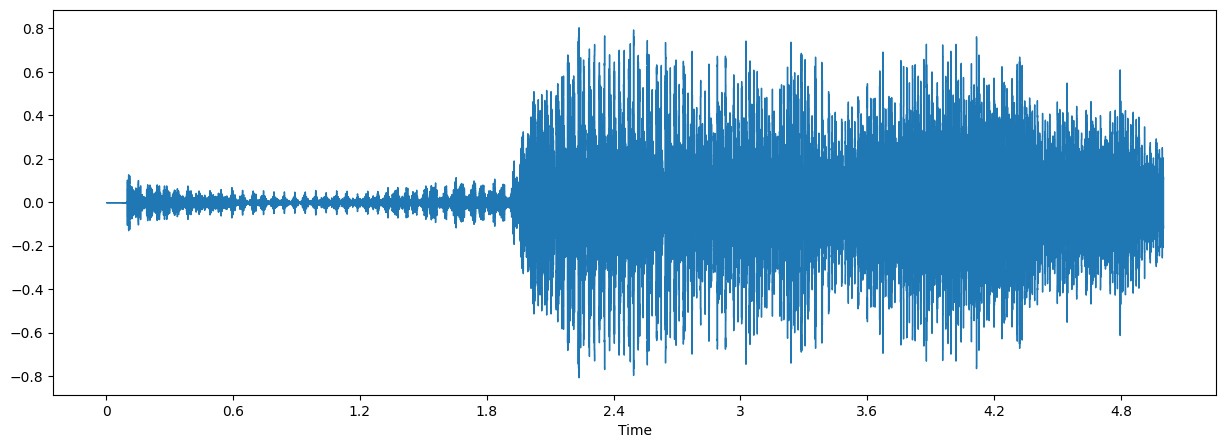

In [ ]:
fname = '/content/drive/MyDrive/cars_youtube/3.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

ipd.Audio(fname)

Звуки автомобиля также были собраны с этих сайтов: [сайт1](https://sounddino.com/en/effects/car-accidents/), [сайт2](https://zvukogram.com/category/proezjayuschie-avtomobili/)

In [ ]:
car_mp3 = '/content/drive/MyDrive/car_sound/'
car_wav = '/content/drive/MyDrive/car_sound_wav/'

In [ ]:
dir_list = os.listdir(car_mp3)
dir_list.sort()
print(dir_list[0:10])

['Sports Car Three Slow Revs - QuickSounds.com.mp3', 'a-short-low-sound-of-a-stalled-engine (1).mp3', 'a-short-low-sound-of-a-stalled-engine.mp3', 'a-short-quick-quiet-sound-of-a-passing-car.mp3', 'a-short-soft-sound-of-a-slamming-door.mp3', 'alarm-sound-in-case-of-an-accident.mp3', 'another-option.mp3', 'approaching-loud-car-sound.mp3', 'asphalt-noise-from-car-tires.mp3', 'atmospheric-sound-of-karting-race-on-the-track.mp3']


In [ ]:
for i in dir_list:
  given_audio = AudioSegment.from_mp3(car_mp3 + i)
  given_audio = given_audio[:5000]
  given_audio.export(f'{car_wav + i[:-3]}wav', format="wav")

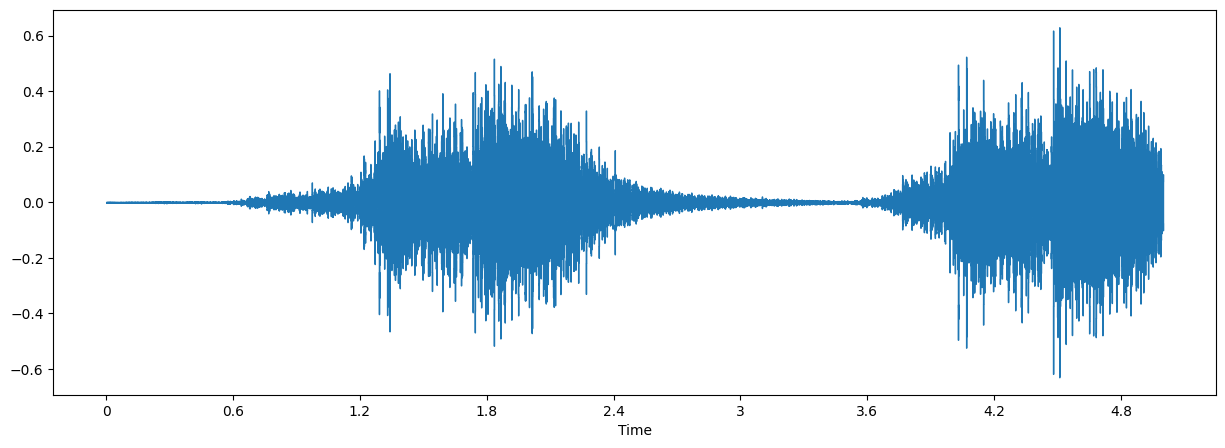

In [ ]:
fname = '/content/drive/MyDrive/car_sound_wav/Sports Car Three Slow Revs - QuickSounds.com.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

ipd.Audio(fname)

Здесь были собраны звуки двигателей, колес, сигнализации, дверей

Звук БПЛА будем искать в видео на ютубе

In [61]:
import os
from pydub import AudioSegment

def split_audio_file(input_file, output_dir, max_duration=5):
    """
    Разбивает аудио-файл на отрезки до 5 секунд.

    Args:
        input_file (str): Путь к входному аудио файлу.
        output_dir (str): Папка для сохранения отрезков.
        max_duration (int): Максимальная продолжительность одного отрезка в секундах.
    """
    try:
        audio = AudioSegment.from_file(input_file)

        total_duration = audio.duration_seconds

        # Если продолжительность меньше или равна максимальной, просто копируем файл
        if total_duration <= max_duration:
            output_file = os.path.join(output_dir, os.path.basename(input_file))
            audio.export(output_file, format=os.path.splitext(input_file)[1][1:])
        # Иначе разбиваем файл на отрезки
        else:
            start_time = 0
            segment_index = 1
            while start_time < total_duration:
                end_time = min(start_time + max_duration, total_duration)

                segment = audio[int(start_time * 1000):int(end_time * 1000)]

                output_file = os.path.join(output_dir, f"{os.path.splitext(os.path.basename(input_file))[0]}_segment_{segment_index}.{os.path.splitext(input_file)[1][1:]}")
                segment.export(output_file, format=os.path.splitext(input_file)[1][1:])

                start_time = end_time
                segment_index += 1
    except Exception as e:
        print(f"Ошибка при обработке файла {input_file}: {e}")

In [88]:
drones = '/content/drive/MyDrive/drone/'
path = []
dir_list = os.listdir(drones)

In [89]:
for i in dir_list:
  split_audio_file(drones + i, '/content/drive/MyDrive/drones/')

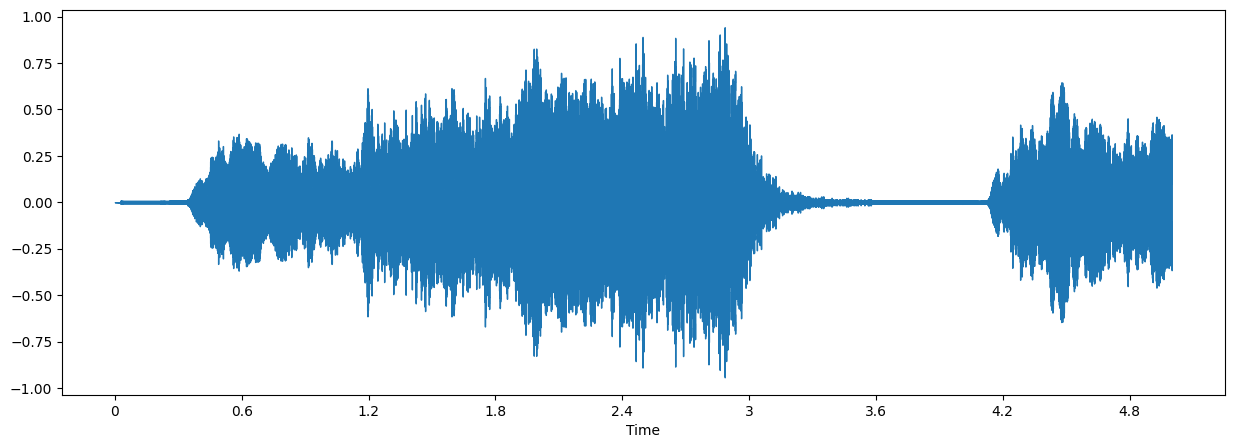

In [65]:
fname = '/content/drive/MyDrive/animals/38454_segment_1.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

ipd.Audio(fname)

In [72]:
drones_mp3 = '/content/drive/MyDrive/drones_mp3/'
drones_wav = '/content/drive/MyDrive/drones_wav/'
dir_list = os.listdir(drones_mp3)
dir_list.sort()
print(dir_list[0:10])

['876.mp3', '877.mp3', '878.mp3', '879.mp3', '880.mp3', '881.mp3', 'and-sometimes-it-is-called-quotquadcopterquot.mp3', 'archivo.mp3', 'drone-takes-off-and-flies.mp3', 'flying-drone.mp3']


In [73]:
for i in dir_list:
  given_audio = AudioSegment.from_mp3(drones_mp3 + i)
  given_audio.export(f'{drones_wav + i[:-3]}wav', format="wav")

In [84]:
from pytube import YouTube
from pydub import AudioSegment

# Вставьте URL-адрес видео с YouTube
url = 'https://www.youtube.com/watch?v=gA7-gb7l3Fc'
folder = '/content/drive/MyDrive/cars_youtube/'

yt = YouTube(url)
file_name = '1'

audio_stream = yt.streams.filter(only_audio=True).first()
audio_stream.download(filename=folder + file_name)

audio = AudioSegment.from_file(file=folder + file_name, format="mp4")

audio.export(f"{folder + file_name}.wav", format="wav")


<_io.BufferedRandom name='/content/drive/MyDrive/cars_youtube/1.wav'>